<a href="https://colab.research.google.com/github/a-kash-1/Learning_OpenCV/blob/master/The_Color_Transfer_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Link for this tutorial:
## https://www.pyimagesearch.com/2014/06/30/super-fast-color-transfer-images/

In [0]:
# Original Source:
## http://www.thegooch.org/Publications/PDFs/ColorTransfer.pdf

In [0]:
# So I have uploaded two images:
## 1. Dawn - The source image 2. Dusk - The target image

In [0]:
import numpy as np
import cv2

In [0]:
def color_transfer(source, target):
  # Convert the images from rgb to lab color space
  # be sure to utilise the floating point dtype (note: 
  # openCV expects floats to be 32 bit, so use that instead of 64 bit)
  # Also, by default openCV takes in input as dtype: uint8 as default
  # but in this case we need it to be floating type as there might be 
  # negative or decimal values
  source = cv2.cvtColor(source, cv2.COLOR_BGR2LAB).astype("float32")
  target = cv2.cvtColor(target, cv2.COLOR_BGR2LAB).astype("float32")

  # Let's start actual color transfer
  (lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = image_stats(source)
  (lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = image_stats(target)

  # Subtract the means from the target image
  (l, a, b) = cv2.split(target)
  l -= lMeanTar
  a -= aMeanTar
  b -= bMeanTar

  # Scale by standard deviation
  l = (lStdTar / lStdSrc) * l
  a = (aStdTar / aStdTar) * a
  b = (bStdTar / bStdTar) * b

  # Add in the source mean
  l += lMeanSrc
  a += aMeanSrc
  b += bMeanSrc

  # clip the pixel intensities to [0, 255] if they fall outside this range
  l = np.clip(l, 0, 255)
  a = np.clip(a, 0, 255)
  b = np.clip(b, 0, 255)

  # Merging back the channels together and converting back to RGB color
  # space, being sure to utilize the 8-bit unsigned integer data
  transfer = cv2.merge([l, a, b])
  transfer = cv2.cvtColor(transfer.astype('uint8'), cv2.COLOR_LAB2BGR)

  # returning the transferred image
  return(transfer)

In [0]:
def image_stats(image):
  # compute the mean and std of each channel
  (l, a, b) = cv2.split(image)
  (lMean, lStd) = (l.mean(), l.std())
  (aMean, aStd) = (a.mean(), a.std())
  (bMean, bStd) = (b.mean(), b.std())

  # return the color statistics
  return(lMean, lStd, aMean, aStd, bMean, bStd)

In [0]:
import matplotlib.pyplot as plt

In [0]:
source = cv2.imread('dusk.jpg')
target = cv2.imread('dawn.jpg')

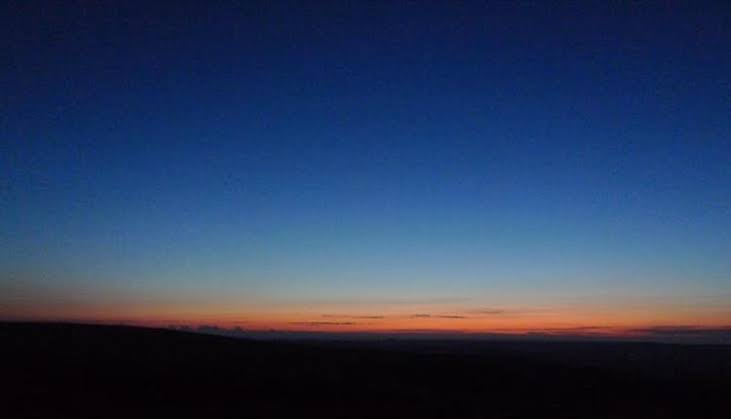

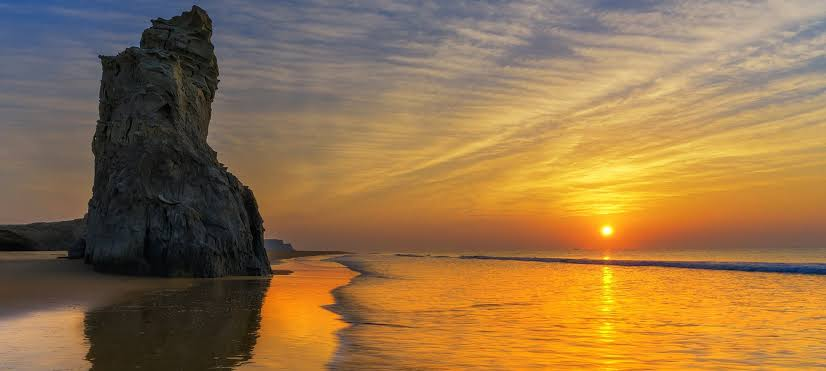

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(source)
cv2_imshow(target)

In [0]:
transferred_image = color_transfer(source, target)

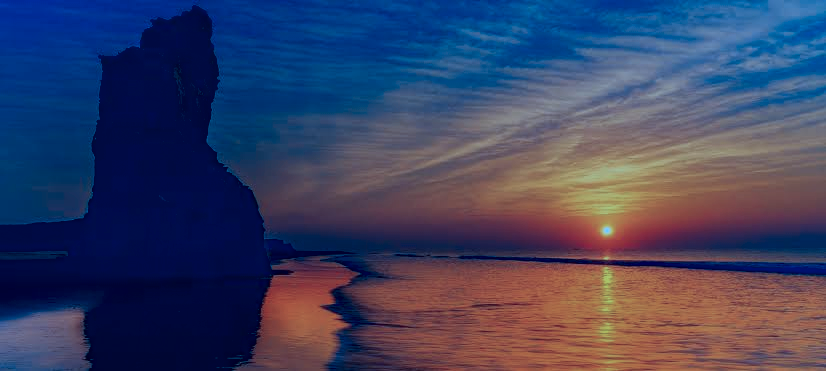

In [0]:
cv2_imshow(transferred_image)